# Customer Churn Analysis

This notebook contains analysis of customer churn data to identify patterns and predictors of customer attrition.

## Setup

Import necessary libraries for data analysis and visualization.

In [3]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# XGBoost
import xgboost as xgb

# Interactive dashboard libraries
import ipywidgets as widgets
from IPython.display import display, HTML

# Set visualization styles
plt.style.use('default')
sns.set_style("whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Data Loading

Load the customer churn dataset.

Dataset shape: (7043, 21)

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

None


Summary statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Missing values in each column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Unique values in each column:
customerID: 7043 unique values
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
Name: count, dtype: int64

gender: 2 unique values
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: 2 unique values
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: 2 unique values
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: 2 unique values
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: 3 unique values
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: 3 unique values
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: 3 unique values
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup: 3 unique values
OnlineBackup
No          

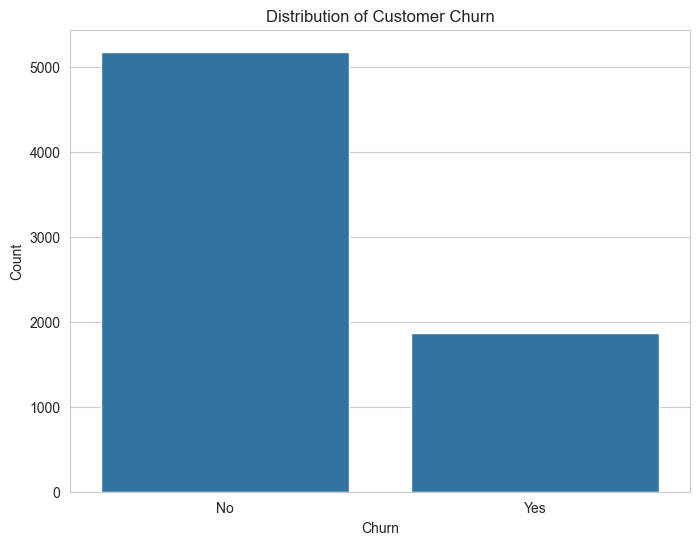

In [10]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Check data types and missing values
print("\nData types and non-null counts:")
display(df.info())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique values in each column:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique values")
        print(df[col].value_counts().head(3))
        print()

# Explore target variable (Churn)
print("\nTarget variable distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.ylabel('Count')
plt.show()

## Exploratory Data Analysis

Explore the dataset to understand its structure and identify patterns.

In [ ]:
# Basic information about the dataset
# df.info()

# Statistical summary
# df.describe()